# **U-Net (3D)**
 ---

<font size = 4> The 3D U-Net was first introduced by [Çiçek et al](https://arxiv.org/abs/1606.06650) for learning dense volumetric segmentations from sparsely annotated ground-truth data building upon the original U-Net architecture by [Ronneberger et al](https://arxiv.org/abs/1505.04597). 

<font size = 4>**This particular implementation allows supervised learning between any two types of 3D image data. If you are interested in image segmentation of 2D datasets, you should use the 2D U-Net notebook instead.**

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project ([ZeroCostDL4Mic](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki)) jointly developed by the [Jacquemet](https://cellmig.org/) and [Henriques](https://henriqueslab.github.io/) laboratories and created by Daniel Krentzel. The BioImage Model Zoo export was jointly developed by [Estibaliz Gómez de Mariscal](https://github.com/esgomezm) (deepImageJ team).

<font size = 4>This notebook is laregly based on the following paper: 

<font size = 4>[**3D U-Net: Learning Dense Volumetric Segmentation from Sparse Annotation**](https://arxiv.org/pdf/1606.06650.pdf) by Özgün Çiçek *et al.* published on arXiv in 2016

<font size = 4>The following two Python libraries play an important role in the notebook: 

1. <font size = 4>[**Elasticdeform**](https://github.com/gvtulder/elasticdeform)
 by Gijs van Tulder was used to augment the 3D training data using elastic grid-based deformations as described in the original 3D U-Net paper. 

2. <font size = 4>[**Tifffile**](https://github.com/cgohlke/tifffile) by Christoph Gohlke is a great library for reading and writing TIFF files. 

3. <font size = 4>[**Imgaug**](https://github.com/aleju/imgaug) by Alexander Jung *et al.* is an amazing library for image augmentation in machine learning - it is the most complete and extensive image augmentation package I have found to date. 

<font size = 4>The [example dataset](https://www.epfl.ch/labs/cvlab/data/data-em/) represents a 5x5x5µm section taken from the CA1 hippocampus region of the brain with annotated mitochondria and was acquired by Graham Knott and Marco Cantoni at EPFL.

<font size = 4>The guidelines to use the trained network in ImageJ with deepImageJ are given in the following paper:

<font size = 4>**DeepImageJ: a user-friendly environment to run deep learning models in ImageJ**, bioRxiv (2019) by *Estibaliz Gómez-de-Mariscal, Carlos García-López-de-Haro, Wei Ouyang, Laurène Donati, Emma Lundberg, Michael Unser, Arrate Muñoz-Barrutia and Daniel Sage* (https://doi.org/10.1101/799270)

<font size = 4>**Please also cite the original paper and relevant Python libraries when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use ZeroCostDL4Mic notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cells:  

<font size = 4>**Text cells** provide information and can be modified by double-clicking the cell. You are currently reading a text cell. You can create a new one by clicking `+ Text`.

<font size = 4>**Code cells** contain code which can be modfied by selecting the cell. To execute the cell, move your cursor to the `[]`-symbol on the left side of the cell (a play button should appear). Click it to execute the cell. Once the cell is fully executed, the animation stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>Three tabs are located on the upper left side of the notebook:

1. <font size = 4>*Table of contents* contains the structure of the notebook. Click the headers to move quickly between sections.

2. <font size = 4>*Code snippets* provides a wide array of example code specific to Google Colab. You can ignore this when using this notebook.

3. <font size = 4>*Files* displays the current working directory. We will mount your Google Drive in Section 1.2. so that you can access your files and save them permanently.

<font size = 4>**Important:** All uploaded files are purged once the runtime ends.

<font size = 4>**Note:** The directory *sample data* in *Files* contains default files. Do not upload anything there!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive by clicking *File* -> *Save a copy in Drive*.

<font size = 4>To **edit a cell**, double click on the text. This will either display the source code (in code cells) or the [markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) (in text cells).
You can use `#` in code cells to comment out parts of the code. This allows you to keep the original piece of code while not executing it.

#**0. Before getting started**
---

<font size = 4>As the network operates in three dimensions, certain consideration should be given to correctly pre-processing the data. Ensure that the structure of interest does not substantially change between slices - image volumes with isotropic pixelsizes are ideal for this architecture.

<font size = 4>Each image volume must be provided as an **8-bit** or **binary multipage TIFF file** to maintain the correct ordering of individual image slices. If more than one image volume has been annotated, source and target files must be named identically and placed in separate directories. In case only one image volume has been annotated, source and target file do not have to be placed in separate directories and can be named differently, as long as their paths are explicitly provided in Section 3. 

<font size = 4>**Prepare two datasets** (*training* and *testing*) for quality control puproses. Make sure that the *testing* dataset does not overlap with the *training* dataset and is ideally sourced from a different acquisiton and sample to ensure robustness of the trained model. 


---


### **Directory structure**

<font size = 4>Make sure to adhere to one of the following directory structures. If only one annotated training volume exists, choose the first structure. In case more than one training volume is available, choose the second structure.

<font size = 4>**Structure 1:** Only one training volume
```
path/to/directory/with/one/training/volume
│--training_source.tif
│--training_target.tif
|   
│--testing_source.tif
|--testing_target.tif 
|
|--data_to_predict_on.tif
|--prediction_results.tif

```
<font size = 4>**Structure 2:** Various training volumes
```
path/to/directory/with/various/training/volumes
│--testing_source.tif
|--testing_target.tif 
|
└───training
|   └───source
|   |   |--training_volume_one.tif
|   |   |--training_volume_two.tif
|   |   |--...
|   |   |--training_volume_n.tif
|   |
|   └───target
|       |--training_volume_one.tif
|       |--training_volume_two.tif
|       |--...
|       |--training_volume_n.tif
|
|--data_to_predict_on.tif
|--prediction_results.tif
```
<font size = 4>**Note:** Naming directories is completely up to you, as long as the paths are correctly specified throughout the notebook.


---


### **Important note**

* <font size = 4>If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do so), you will need to run **Sections 1 - 4**, then use **Section 5** to assess the quality of your model and **Section 6** to run predictions using the model that you trained.

* <font size = 4>If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **Sections 1 and 2** to set up the notebook, then use **Section 5** to assess the quality of your model.

* <font size = 4> If you only wish to **Run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **Sections 1 and 2** to set up the notebook, then use **Section 6** to run the predictions on the desired model.
---

In [ ]:
#@markdown ##**Download example dataset**

#@markdown <font size = 4> This usually takes a few minutes. The images are saved in *example_dataset*.

import requests  
import os
from tqdm.notebook import tqdm 

def make_directory(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

def download_from_url(url, save_as):
    file_url = url
    r = requests.get(file_url, stream=True)  
  
    with open(save_as, 'wb') as file:  
        for block in tqdm(r.iter_content(chunk_size = 1024), desc = 'Downloading ' + os.path.basename(save_as),  total=126875, ncols=1000):
            if block:
                file.write(block)  


make_directory('example_dataset')

download_from_url('https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training.tif', 'example_dataset/training.tif')
download_from_url('https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training_groundtruth.tif', 'example_dataset/training_groundtruth.tif')
download_from_url('https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/testing.tif', 'example_dataset/testing.tif')
download_from_url('https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/testing_groundtruth.tif', 'example_dataset/testing_groundtruth.tif')

print('Example dataset successfully downloaded!')

In [ ]:
#@markdown ##Unzip pre-trained model directory

#@markdown 1.  <font size = 4>Upload a zipped model directory using the *Files* tab
#@markdown 2.  <font size = 4>Run this cell to unzip your model file
#@markdown 3.  <font size = 4>The model directory will appear in the *Files* tab 

from google.colab import files

zipped_model_file = "" #@param {type:"string"}

!unzip "$zipped_model_file"

# **1. Install 3D U-Net dependencies**
---


## **1.1. Install key dependencies**
---
<font size = 4> 

In [ ]:
#@markdown ##Play to install 3D U-Net dependencies

!pip install bioimageio.core==0.4.7
# !pip uninstall -y keras-nightly
!pip install data
!pip install fpdf
!pip install h5py==2.10


#Force session restart
exit(0)


## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>

## **1.3. Load key dependencies**
---
<font size = 4> 

In [1]:
#@markdown ##Load key 3D U-Net dependencies and instantiate network
Notebook_version = '1.13'
Network = 'U-Net (3D) BioimageIO'

from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path, delimiter = "\n")
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item + '\n')

    file.close()

import sys
before = [str(m) for m in sys.modules]

#Put the imported code and libraries here
# !pip install fpdf
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    import elasticdeform
except:
    !pip install elasticdeform
    import elasticdeform

try:
    import tifffile
except:
    !pip install tifffile
    import tifffile

try:
    import imgaug.augmenters as iaa
except:
    !pip install imgaug
    import imgaug.augmenters as iaa

import os
import csv
import random
import h5py
import imageio
import math
import shutil

import pandas as pd
from glob import glob
from tqdm import tqdm

from skimage import transform
from skimage import exposure
from skimage import color
from skimage import io

from scipy.ndimage import zoom

import matplotlib.pyplot as plt

import numpy as np

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

# from keras import backend as K

# from keras.layers import Conv3D
# from keras.layers import BatchNormalization
# from keras.layers import ReLU
# from keras.layers import MaxPooling3D
# from keras.layers import Conv3DTranspose
# from keras.layers import Input
# from keras.layers import Concatenate

# from keras.models import Model

# from keras.utils import Sequence
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import CSVLogger
# from keras.callbacks import Callback

from tensorflow.keras import backend as K

from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import Conv3DTranspose
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

from tensorflow.keras.models import Model

from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from ipywidgets import interact
from ipywidgets import interactive
from ipywidgets import fixed
from ipywidgets import interact_manual 
import ipywidgets as widgets

from fpdf import FPDF, HTMLMixin
from datetime import datetime
import subprocess
from pip._internal.operations.freeze import freeze
import time

from skimage import io
import matplotlib

print("Dependencies installed and imported.")

# Define MultiPageTiffGenerator class
class MultiPageTiffGenerator(Sequence):

    def __init__(self,
                 source_path,
                 target_path,
                 batch_size=1,
                 shape=(128,128,32,1),
                 augment=False,
                 augmentations=[],
                 deform_augment=False,
                 deform_augmentation_params=(5,3,4),
                 val_split=0.2,
                 is_val=False,
                 random_crop=True,
                 downscale=1,
                 binary_target=False):

        # If directory with various multi-page tiffiles is provided read as list
        if os.path.isfile(source_path):
            self.dir_flag = False
            self.source = tifffile.imread(source_path)
            if binary_target:
                self.target = tifffile.imread(target_path).astype(np.bool)
            else:
                self.target = tifffile.imread(target_path)

        elif os.path.isdir(source_path):
            self.dir_flag = True
            self.source_dir_list = glob(os.path.join(source_path, '*'))
            self.target_dir_list = glob(os.path.join(target_path, '*'))

            self.source_dir_list.sort()
            self.target_dir_list.sort()

        self.shape = shape
        self.batch_size = batch_size
        self.augment = augment
        self.val_split = val_split
        self.is_val = is_val
        self.random_crop = random_crop
        self.downscale = downscale
        self.binary_target = binary_target
        self.deform_augment = deform_augment
        self.on_epoch_end()
        
        if self.augment:
            # pass list of augmentation functions 
            self.seq = iaa.Sequential(augmentations, random_order=True) # apply augmenters in random order
        if self.deform_augment:
            self.deform_sigma, self.deform_points, self.deform_order = deform_augmentation_params

    def __len__(self):
        # If various multi-page tiff files provided sum all images within each
        if self.augment:
            augment_factor = 4
        else:
            augment_factor = 1
    
        if self.dir_flag:
            num_of_imgs = 0
            for tiff_path in self.source_dir_list:
                num_of_imgs += tifffile.imread(tiff_path).shape[0]
            xy_shape = tifffile.imread(self.source_dir_list[0]).shape[1:]

            if self.is_val:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = xy_shape[0] * xy_shape[1] * self.val_split * num_of_imgs
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))
                else:
                    return math.floor(self.val_split * num_of_imgs / self.batch_size)
            else:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = xy_shape[0] * xy_shape[1] * (1 - self.val_split) * num_of_imgs
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))

                else:
                    return math.floor(augment_factor*(1 - self.val_split) * num_of_imgs/self.batch_size)
        else:
            if self.is_val:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = self.source.shape[0] * self.source.shape[1] * self.val_split * self.source.shape[2]
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))
                else:
                    return math.floor((self.val_split * self.source.shape[0] / self.batch_size))
            else:
                if self.random_crop:
                    crop_volume = self.shape[0] * self.shape[1] * self.shape[2]
                    volume = self.source.shape[0] * self.source.shape[1] * (1 - self.val_split) * self.source.shape[2]
                    return math.floor(augment_factor * volume / (crop_volume * self.batch_size * self.downscale))
                else:
                    return math.floor(augment_factor * (1 - self.val_split) * self.source.shape[0] / self.batch_size)

    def __getitem__(self, idx):
        source_batch = np.empty((self.batch_size,
                                 self.shape[0],
                                 self.shape[1],
                                 self.shape[2],
                                 self.shape[3]))
        target_batch = np.empty((self.batch_size,
                                 self.shape[0],
                                 self.shape[1],
                                 self.shape[2],
                                 self.shape[3]))

        for batch in range(self.batch_size):
            # Modulo operator ensures IndexError is avoided
            stack_start = self.batch_list[(idx+batch*self.shape[2])%len(self.batch_list)]

            if self.dir_flag:
                self.source = tifffile.imread(self.source_dir_list[stack_start[0]])
                if self.binary_target:
                    self.target = tifffile.imread(self.target_dir_list[stack_start[0]]).astype(np.bool)
                else:
                    self.target = tifffile.imread(self.target_dir_list[stack_start[0]])

            src_list = []
            tgt_list = []
            for i in range(stack_start[1], stack_start[1]+self.shape[2]):
                src = self.source[i]
                src = transform.downscale_local_mean(src, (self.downscale, self.downscale))
                if not self.random_crop:
                    src = transform.resize(src, (self.shape[0], self.shape[1]), mode='constant', preserve_range=True)
                src = self._min_max_scaling(src)
                src_list.append(src)

                tgt = self.target[i]
                tgt = transform.downscale_local_mean(tgt, (self.downscale, self.downscale))
                if not self.random_crop:
                    tgt = transform.resize(tgt, (self.shape[0], self.shape[1]), mode='constant', preserve_range=True)
                if not self.binary_target:
                    tgt = self._min_max_scaling(tgt)
                tgt_list.append(tgt)

            if self.random_crop:
                if src.shape[0] == self.shape[0]:
                    x_rand = 0
                if src.shape[1] == self.shape[1]:
                    y_rand = 0
                if src.shape[0] > self.shape[0]:
                    x_rand = np.random.randint(src.shape[0] - self.shape[0])
                if src.shape[1] > self.shape[1]:
                    y_rand = np.random.randint(src.shape[1] - self.shape[1])
                if src.shape[0] < self.shape[0] or src.shape[1] < self.shape[1]:
                    raise ValueError('Patch shape larger than (downscaled) source shape')
            
            for i in range(self.shape[2]):
                if self.random_crop:
                    src = src_list[i]
                    tgt = tgt_list[i]
                    src_crop = src[x_rand:self.shape[0]+x_rand, y_rand:self.shape[1]+y_rand]
                    tgt_crop = tgt[x_rand:self.shape[0]+x_rand, y_rand:self.shape[1]+y_rand]
                else:
                    src_crop = src_list[i]
                    tgt_crop = tgt_list[i]

                source_batch[batch,:,:,i,0] = src_crop
                target_batch[batch,:,:,i,0] = tgt_crop

        if self.augment:
            # On-the-fly data augmentation
            source_batch, target_batch = self.augment_volume(source_batch, target_batch)

            # Data augmentation by reversing stack
            if np.random.random() > 0.5:
                source_batch, target_batch = source_batch[::-1], target_batch[::-1]
            
            # Data augmentation by elastic deformation
            if np.random.random() > 0.5 and self.deform_augment:
                source_batch, target_batch = self.deform_volume(source_batch, target_batch)
            
            if not self.binary_target:
                target_batch = self._min_max_scaling(target_batch)
            
            return self._min_max_scaling(source_batch), target_batch
        
        else:
            return source_batch, target_batch

    def on_epoch_end(self):
        # Validation split performed here
        self.batch_list = []
        # Create batch_list of all combinations of tifffile and stack position
        if self.dir_flag:
            for i in range(len(self.source_dir_list)):
                num_of_pages = tifffile.imread(self.source_dir_list[i]).shape[0]
                if self.is_val:
                    start_page = num_of_pages-math.floor(self.val_split*num_of_pages)
                    for j in range(start_page, num_of_pages-self.shape[2]):
                      self.batch_list.append([i, j])
                else:
                    last_page = math.floor((1-self.val_split)*num_of_pages)
                    for j in range(last_page-self.shape[2]):
                        self.batch_list.append([i, j])
        else:
            num_of_pages = self.source.shape[0]
            if self.is_val:
                start_page = num_of_pages-math.floor(self.val_split*num_of_pages)
                for j in range(start_page, num_of_pages-self.shape[2]):
                    self.batch_list.append([0, j])

            else:
                last_page = math.floor((1-self.val_split)*num_of_pages)
                for j in range(last_page-self.shape[2]):
                    self.batch_list.append([0, j])
        
        if self.is_val and (len(self.batch_list) <= 0):
            raise ValueError('validation_split too small! Increase val_split or decrease z-depth')
        random.shuffle(self.batch_list)
   
    def _min_max_scaling(self, data):
        n = data - np.min(data)
        d = np.max(data) - np.min(data) 
        
        return n/d
   
    def class_weights(self):
        ones = 0
        pixels = 0

        if self.dir_flag:
            for i in range(len(self.target_dir_list)):
                tgt = tifffile.imread(self.target_dir_list[i]).astype(np.bool)
                ones += np.sum(tgt)
                pixels += tgt.shape[0]*tgt.shape[1]*tgt.shape[2]
        else:
          ones = np.sum(self.target)
          pixels = self.target.shape[0]*self.target.shape[1]*self.target.shape[2]
        p_ones = ones/pixels
        p_zeros = 1-p_ones

        # Return swapped probability to increase weight of unlikely class
        return p_ones, p_zeros

    def deform_volume(self, src_vol, tgt_vol):
        [src_dfrm, tgt_dfrm] = elasticdeform.deform_random_grid([src_vol, tgt_vol],
                                                                axis=(1, 2, 3),
                                                                sigma=self.deform_sigma,
                                                                points=self.deform_points,
                                                                order=self.deform_order)
        if self.binary_target:
            tgt_dfrm = tgt_dfrm > 0.1
        
        return self._min_max_scaling(src_dfrm), tgt_dfrm 

    def augment_volume(self, src_vol, tgt_vol):
        src_vol_aug = np.empty(src_vol.shape)
        tgt_vol_aug = np.empty(tgt_vol.shape)

        for i in range(src_vol.shape[3]):
            src_vol_aug[:,:,:,i,0], tgt_vol_aug[:,:,:,i,0] = self.seq(images=src_vol[:,:,:,i,0].astype('float16'), 
                                                                      segmentation_maps=tgt_vol[:,:,:,i,0].astype(bool))
        return self._min_max_scaling(src_vol_aug), tgt_vol_aug

    def sample_augmentation(self, idx):
        src, tgt = self.__getitem__(idx)

        src_aug, tgt_aug = self.augment_volume(src, tgt)
        
        if self.deform_augment:
            src_aug, tgt_aug = self.deform_volume(src_aug, tgt_aug)

        return src_aug, tgt_aug 

# Define custom loss and dice coefficient
def dice_coefficient(y_true, y_pred):
    eps = 1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f*y_pred_f)

    return (2.*intersection)/(K.sum(y_true_f*y_true_f)+K.sum(y_pred_f*y_pred_f)+eps)

def weighted_binary_crossentropy(zero_weight, one_weight):
    def _weighted_binary_crossentropy(y_true, y_pred):
        binary_crossentropy = K.binary_crossentropy(y_true, y_pred)

        weight_vector = y_true*one_weight+(1.-y_true)*zero_weight
        weighted_binary_crossentropy = weight_vector*binary_crossentropy

        return K.mean(weighted_binary_crossentropy)

    return _weighted_binary_crossentropy

# Custom callback showing sample prediction
class SampleImageCallback(Callback):

    def __init__(self, model, sample_data, model_path, save=False):
        self.model = model
        self.sample_data = sample_data
        self.model_path = model_path
        self.save = save

    def on_epoch_end(self, epoch, logs={}):
        sample_predict = self.model.predict_on_batch(self.sample_data)

        f=plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        plt.imshow(self.sample_data[0,:,:,0,0], interpolation='nearest', cmap='gray')
        plt.title('Sample source')
        plt.axis('off');

        plt.subplot(1,2,2)
        plt.imshow(sample_predict[0,:,:,0,0], interpolation='nearest', cmap='magma')
        plt.title('Predicted target')
        plt.axis('off');

        plt.show()

        if self.save:
            plt.savefig(self.model_path + '/epoch_' + str(epoch+1) + '.png')


# Define Unet3D class
class Unet3D:

    def __init__(self,
                 shape=(256,256,16,1)):
        if isinstance(shape, str):
            shape = eval(shape)

        self.shape = shape
        
        input_tensor = Input(self.shape, name='input')

        self.model = self.unet_3D(input_tensor)

    def down_block_3D(self, input_tensor, filters):
        x = Conv3D(filters=filters, kernel_size=(3,3,3), padding='same')(input_tensor)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv3D(filters=filters*2, kernel_size=(3,3,3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        return x

    def up_block_3D(self, input_tensor, concat_layer, filters):
        x = Conv3DTranspose(filters, kernel_size=(2,2,2), strides=(2,2,2))(input_tensor)

        x = Concatenate()([x, concat_layer])

        x = Conv3D(filters=filters, kernel_size=(3,3,3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv3D(filters=filters*2, kernel_size=(3,3,3), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        return x

    def unet_3D(self, input_tensor, filters=32):
        d1 = self.down_block_3D(input_tensor, filters=filters)
        p1 = MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), data_format='channels_last')(d1)
        d2 = self.down_block_3D(p1, filters=filters*2)
        p2 = MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), data_format='channels_last')(d2)
        d3 = self.down_block_3D(p2, filters=filters*4)
        p3 = MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), data_format='channels_last')(d3)

        d4 = self.down_block_3D(p3, filters=filters*8)

        u1 = self.up_block_3D(d4, d3, filters=filters*4)
        u2 = self.up_block_3D(u1, d2, filters=filters*2)
        u3 = self.up_block_3D(u2, d1, filters=filters)

        output_tensor = Conv3D(filters=1, kernel_size=(1,1,1), activation='sigmoid')(u3)

        return Model(inputs=[input_tensor], outputs=[output_tensor])

    def summary(self):
        return self.model.summary()

    # Pass generators instead
    def train(self, 
              epochs, 
              batch_size, 
              train_generator,
              val_generator, 
              model_path, 
              model_name,
              optimizer='adam',
              learning_rate=0.001,
              loss='weighted_binary_crossentropy',
              metrics='dice',
              ckpt_period=1, 
              save_best_ckpt_only=False, 
              ckpt_path=None):

        class_weight_zero, class_weight_one = train_generator.class_weights()
        
        if loss == 'weighted_binary_crossentropy':
            loss = weighted_binary_crossentropy(class_weight_zero, class_weight_one)
        
        if metrics == 'dice':
            metrics = dice_coefficient

        if optimizer == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            optimizer = SGD(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            optimizer = RMSprop(learning_rate=learning_rate)

        self.model.compile(optimizer=optimizer,
                           loss=loss,
                           metrics=[metrics])

        if ckpt_path is not None:
            self.model.load_weights(ckpt_path)

        full_model_path = os.path.join(model_path, model_name)

        if not os.path.exists(full_model_path):
            os.makedirs(full_model_path)
        
        log_dir = full_model_path + '/Quality Control'

        if not os.path.exists(log_dir):
            os.makedirs(log_dir)
        
        ckpt_dir =  full_model_path + '/ckpt'

        if not os.path.exists(ckpt_dir):
            os.makedirs(ckpt_dir)

        csv_out_name = log_dir + '/training_evaluation.csv'
        if ckpt_path is None:
            csv_logger = CSVLogger(csv_out_name)
        else:
            csv_logger = CSVLogger(csv_out_name, append=True)

        if save_best_ckpt_only:
            ckpt_name = ckpt_dir + '/' + model_name + '.hdf5'
        else:
            ckpt_name = ckpt_dir + '/' + model_name + '_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.hdf5'
        
        model_ckpt = ModelCheckpoint(ckpt_name,
                                     verbose=1,
                                     period=ckpt_period,
                                     save_best_only=save_best_ckpt_only,
                                     save_weights_only=True)

        sample_batch, __ = val_generator.__getitem__(random.randint(0, len(val_generator)))
        sample_img = SampleImageCallback(self.model, 
                                         sample_batch, 
                                         model_path)

        self.model.fit_generator(generator=train_generator,
                                 validation_data=val_generator,
                                 validation_steps=math.floor(len(val_generator)/batch_size),
                                 epochs=epochs,
                                 callbacks=[csv_logger,
                                            model_ckpt,
                                            sample_img])

        last_ckpt_name = ckpt_dir + '/' + model_name + '_last.hdf5'
        self.model.save_weights(last_ckpt_name)

    def _min_max_scaling(self, data):
        n = data - np.min(data)
        d = np.max(data) - np.min(data) 
        
        return n/d

    def predict(self, 
                input, 
                ckpt_path, 
                z_range=None, 
                downscaling=None, 
                true_patch_size=None):

        self.model.load_weights(ckpt_path)

        if isinstance(downscaling, str):
            downscaling = eval(downscaling)

        if math.isnan(downscaling):
            downscaling = None

        if isinstance(true_patch_size, str):
            true_patch_size = eval(true_patch_size)
        
        if not isinstance(true_patch_size, tuple): 
            if math.isnan(true_patch_size):
                true_patch_size = None

        if isinstance(input, str):
            src_volume = tifffile.imread(input)
        elif isinstance(input, np.ndarray):
            src_volume = input
        else:
            raise TypeError('Input is not path or numpy array!')
        
        in_size = src_volume.shape

        if downscaling or true_patch_size is not None:
            x_scaling = 0
            y_scaling = 0

            if true_patch_size is not None:
                x_scaling += true_patch_size[0]/self.shape[0]
                y_scaling += true_patch_size[1]/self.shape[1]
            if downscaling is not None:
                x_scaling += downscaling
                y_scaling += downscaling

            src_list = []
            for i in range(src_volume.shape[0]):
                 src_list.append(transform.downscale_local_mean(src_volume[i], (int(x_scaling), int(y_scaling))))
            src_volume = np.array(src_list)          

        if z_range is not None:
            src_volume = src_volume[z_range[0]:z_range[1]]

        src_volume = self._min_max_scaling(src_volume)       

        src_array = np.zeros((1,
                              math.ceil(src_volume.shape[1]/self.shape[0])*self.shape[0], 
                              math.ceil(src_volume.shape[2]/self.shape[1])*self.shape[1],
                              math.ceil(src_volume.shape[0]/self.shape[2])*self.shape[2], 
                              self.shape[3]))

        for i in range(src_volume.shape[0]):
            src_array[0,:src_volume.shape[1],:src_volume.shape[2],i,0] = src_volume[i]

        pred_array = np.empty(src_array.shape)

        for i in range(math.ceil(src_volume.shape[1]/self.shape[0])):
          for j in range(math.ceil(src_volume.shape[2]/self.shape[1])):
            for k in range(math.ceil(src_volume.shape[0]/self.shape[2])):
                pred_temp = self.model.predict(src_array[:,
                                                         i*self.shape[0]:i*self.shape[0]+self.shape[0],
                                                         j*self.shape[1]:j*self.shape[1]+self.shape[1],
                                                         k*self.shape[2]:k*self.shape[2]+self.shape[2]])
                pred_array[:,
                           i*self.shape[0]:i*self.shape[0]+self.shape[0],
                           j*self.shape[1]:j*self.shape[1]+self.shape[1],
                           k*self.shape[2]:k*self.shape[2]+self.shape[2]] = pred_temp
                           
        pred_volume = np.rollaxis(np.squeeze(pred_array), -1)[:src_volume.shape[0],:src_volume.shape[1],:src_volume.shape[2]]            

        if downscaling is not None:
            pred_list = []
            for i in range(pred_volume.shape[0]):
                 pred_list.append(transform.resize(pred_volume[i], (in_size[1], in_size[2]), preserve_range=True))
            pred_volume = np.array(pred_list)

        return pred_volume

def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
    
  # add another cell 
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and methods:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  if os.path.isdir(training_source):
    shape = io.imread(training_source+'/'+os.listdir(training_source)[0]).shape
  elif os.path.isfile(training_source):
    shape = io.imread(training_source).shape
  else:
    print('Cannot read training data.')

  dataset_size = len(train_generator)

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+') with a batch size of '+str(batch_size)+' and a '+loss_function+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch_size: '+str(patch_size)+') with a batch size of '+str(batch_size)+' and a '+loss_function+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by'
    if add_gaussian_blur == True:
      aug_text = aug_text+'\n- gaussian blur'
    if add_linear_contrast == True:
      aug_text = aug_text+'\n- linear contrast'
    if add_additive_gaussian_noise == True:
      aug_text = aug_text+'\n- additive gaussian noise'
    if augmenters != '':
      aug_text = aug_text+'\n- imgaug augmentations: '+augmenters
    if add_elastic_deform == True:
      aug_text = aug_text+'\n- elastic deformation'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if use_default_advanced_parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=60% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>image_pre_processing</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>validation_split_in_percent</td>
      <td width = 50%>{4}</td>
    </tr>
      <tr>
      <td width = 50%>downscaling_in_xy</td>
      <td width = 50%>{5}</td>
    </tr>
      <tr>
      <td width = 50%>binary_target</td>
      <td width = 50%>{6}</td>
    </tr>
    <tr>
      <td width = 50%>loss_function</td>
      <td width = 50%>{7}</td>
    </tr>
    <tr>
      <td width = 50%>metrics</td>
      <td width = 50%>{8}</td>
    </tr>
    <tr>
      <td width = 50%>optimizer</td>
      <td width = 50%>{9}</td>
    </tr>
    <tr>
      <td width = 50%>checkpointing_period</td>
      <td width = 50%>{10}</td>
    </tr>
    <tr>
      <td width = 50%>save_best_only</td>
      <td width = 50%>{11}</td>
    </tr>
    <tr>
      <td width = 50%>resume_training</td>
      <td width = 50%>{12}</td>
    </tr>
  </table>
  """.format(number_of_epochs,batch_size,str(patch_size[0])+'x'+str(patch_size[1])+'x'+str(patch_size[2]),image_pre_processing, validation_split_in_percent, downscaling_in_xy, str(binary_target), loss_function, metrics, optimizer, checkpointing_period, str(save_best_only), str(resume_training))
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = training_source, align = 'L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair (single slice)', ln=1)
  pdf.ln(1)
  exp_size = io.imread('/content/TrainingDataExample_Unet3D.png').shape
  pdf.image('/content/TrainingDataExample_Unet3D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Unet 3D: Çiçek, Özgün, et al. "3D U-Net: learning dense volumetric segmentation from sparse annotation." International conference on medical image computing and computer-assisted intervention. Springer, Cham, 2016.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  # if Use_Data_augmentation:
  #   ref_4 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
  #   pdf.multi_cell(190, 5, txt = ref_4, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(model_path+'/'+model_name+'/'+model_name+'_training_report.pdf')

  print('------------------------------')
  print('PDF report exported in '+model_path+'/'+model_name+'/')


def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'U-Net 3D'

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+qc_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Loss curves', ln=1, align='L')
  pdf.ln(1)
  if os.path.exists(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/lossCurvePlots.png'):
    exp_size = io.imread(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/lossCurvePlots.png').shape
    pdf.image(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_example_data.png').shape
  pdf.image(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'IoU threshold optimisation', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.ln(1)
  pdf.cell(120, 5, txt='Highest IoU is {:.4f} with a threshold of {}'.format(best_iou, best_thresh), align='L', ln=1)
  pdf.ln(2)
  exp_size = io.imread(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_IoU_analysis.png').shape
  pdf.image(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_IoU_analysis.png', x=16, y=None, w = round(exp_size[1]/6), h = round(exp_size[0]/6))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Unet 3D: Çiçek, Özgün, et al. "3D U-Net: learning dense volumetric segmentation from sparse annotation." International conference on medical image computing and computer-assisted intervention. Springer, Cham, 2016.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/'+qc_model_name+'_QC_report.pdf')

  print('------------------------------')
  print('QC PDF report exported in '+os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/')


# -------------- Other definitions -----------
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red
prediction_prefix = 'Predicted_'


print('-------------------')
print('U-Net 3D and dependencies installed.')

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'
  NORMAL = '\033[0m'  # white (normal)
  

# Check if this is the latest version of the notebook
# Latest_notebook_version = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_ZeroCostDL4Mic_Release.csv")

# if Notebook_version == list(Latest_notebook_version.columns):
#   print("This notebook is up-to-date.")

# if not Notebook_version == list(Latest_notebook_version.columns):
#   print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")



# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)


TensorFlow 1.x selected.
1.15.2
Dependencies installed and imported.
-------------------
U-Net 3D and dependencies installed.
Notebook version: 1.13
Latest notebook version: 1.13
This notebook is up-to-date.


# **2. Complete the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [2]:
#@markdown ##Run this cell to check if you have GPU access

if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi


You have GPU access
Wed Jan 26 23:28:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    44W / 250W |    257MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount Google Drive**
---
<font size = 4> To use this notebook with your **own data**, place it in a folder on **Google Drive** following one of the directory structures outlined in **Section 0**.

1. <font size = 4> **Run** the **cell** below to mount your Google Drive and follow the link. 

2. <font size = 4>**Sign in** to your Google account and press 'Allow'. 

3. <font size = 4>Next, copy the **authorization code**, paste it into the cell and press enter. This will allow Colab to read and write data from and to your Google Drive. 

4. <font size = 4> Once this is done, your data can be viewed in the **Files tab** on the top left of the notebook after hitting 'Refresh'.

In [3]:
#@markdown ##Play the cell to connect your Google Drive to Colab

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **3. Select your parameters and paths**
---

## **3.1. Choosing parameters**

---

### **Paths to training data and model**

* <font size = 4>**`training_source`** and **`training_target`** specify the paths to the training data. They can either be a single multipage TIFF file each or directories containing various multipage TIFF files in which case target and source files must be named identically within the respective directories. See Section 0 for a detailed description of the necessary directory structure.

* <font size = 4>**`model_name`** will be used when naming checkpoints. Adhere to a `lower_case_with_underscores` naming convention and beware of using the name of an existing model within the same folder, as it will be overwritten.

* <font size = 4>**`model_path`** specifies the directory where the model checkpoints and quality control logs will be saved.


<font size = 4>**Note:** You can copy paths from the 'Files' tab by right-clicking any folder or file and selecting 'Copy path'. 

### **Training parameters**

* <font size = 4>**`number_of_epochs`** is the number of times the entire training data will be seen by the model. *Default: >100*

* <font size = 4>**`batch_size`** is the number of training patches of size `patch_size` that will be bundled together at each training step. *Default: 1*

* <font size = 4>**`patch_size`** specifies the size of the three-dimensional training patches in (x, y, z) that will be fed to the model. In order to avoid errors, preferably use a square aspect ratio or stick to the advanced parameters. *Default: <(512, 512, 16)*

* <font size = 4>**`validation_split_in_percent`** is the relative amount of training data that will be set aside for validation. *Default: 20* 

* <font size = 4>**`downscaling_in_xy`** downscales the training images by the specified amount in x and y. This is useful to enforce isotropic pixel-size if the z resolution is lower than the xy resolution in the training volume or to capture a larger field-of-view while decreasing the memory requirements. *Default: 1*

* <font size = 4>**`image_pre_processing`** selects whether the training images are randomly cropped during training or resized to `patch_size`. Choose `randomly crop to patch_size` to shrink the field-of-view of the training images to the `patch_size`. *Default: resize to patch_size* 

* <font size = 4>**`binary_target`** forces the target image to be binary. Choose this if your model is trained to perform binary segmentation tasks *Default: True* 

* <font size = 4>**`loss_function`** defines the loss. Read more [here](https://keras.io/api/losses/). *Default: weighted_binary_crossentropy* 

* <font size = 4>**`metrics`** defines the metric. Read more [here](https://keras.io/api/metrics/). *Default: dice* 

* <font size = 4>**`optimizer`** defines the optimizer. Read more [here](https://keras.io/api/optimizers/). *Default: adam* 

<font size = 4>**Note:** If a *ResourceExhaustedError* is raised in Section 4.1. during training, decrease `batch_size` and `patch_size`. Decrease `batch_size` first and if the error persists at `batch_size = 1`, reduce the `patch_size`.  

<font size = 4>**Note:** The number of steps per epoch are calculated as `floor(augment_factor * (1 - validation_split) * num_of_slices / batch_size)` if `image_pre_processing` is `resize to patch_size` where `augment_factor` is three if `apply_data_augmentation` is `True` and one otherwise. The `num_of_slices` is the overall number of slices (z-depth) in the training set across all provided image volumes. If `image_pre_processing` is `randomly crop to patch_size`, the number of steps per epoch are calculated as `floor(augment_factor * volume / (crop_volume * batch_size))` where `volume` is the overall volume of the training data in pixels accounting for the validation split and `crop_volume` is defined as the volume in pixels based on the specified `patch_size`.

This is what the training images will look like with the chosen settings


interactive(children=(IntSlider(value=1, description='z', max=354, min=1), Output()), _dom_classes=('widget-in…

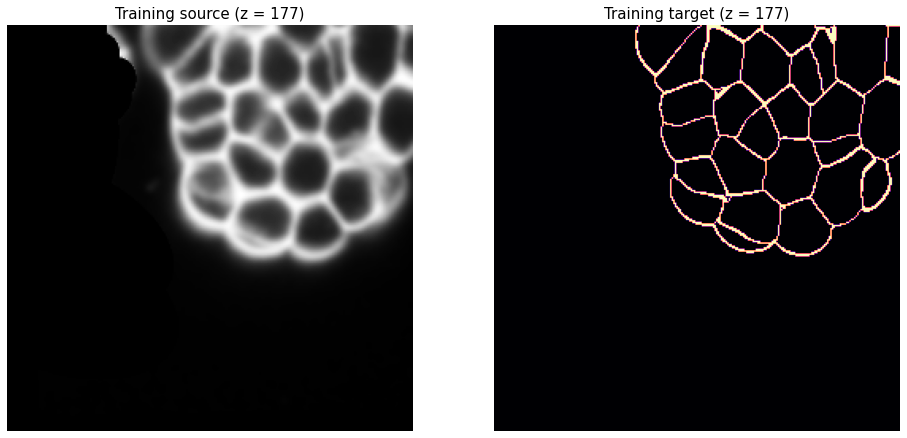

In [8]:
#@markdown ###Path to training data:
training_source = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/arabidopsis/reduced_dataset/inputs" #@param {type:"string"}
training_target = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/arabidopsis/reduced_dataset/boundaries" #@param {type:"string"}

#@markdown ---

#@markdown ###Model name and path to model folder:
model_name = "arabidopsis-24012022" #@param {type:"string"}
model_path = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ" #@param {type:"string"}

full_model_path = os.path.join(model_path, model_name)

#@markdown ---

#@markdown ###Training parameters
number_of_epochs =   3#@param {type:"number"}

#@markdown ###Default advanced parameters
use_default_advanced_parameters = False #@param {type:"boolean"}

#@markdown <font size = 3>If not, please change:

batch_size =  3#@param {type:"number"}
patch_size = (256,256,8) #@param {type:"number"} # in pixels
training_shape = patch_size + (1,)
image_pre_processing = 'randomly crop to patch_size' #@param ["randomly crop to patch_size", "resize to patch_size"]

validation_split_in_percent = 20 #@param{type:"number"}
downscaling_in_xy =  1#@param {type:"number"} # in pixels

binary_target = True #@param {type:"boolean"}

loss_function = 'weighted_binary_crossentropy' #@param ["weighted_binary_crossentropy", "binary_crossentropy", "categorical_crossentropy", "sparse_categorical_crossentropy", "mean_squared_error", "mean_absolute_error"]

metrics = 'dice' #@param ["dice", "accuracy"]

optimizer = 'adam' #@param ["adam", "sgd", "rmsprop"]

learning_rate = 0.0001 #@param{type:"number"}

if image_pre_processing == "randomly crop to patch_size":
    random_crop = True
else:
    random_crop = False

if use_default_advanced_parameters: 
    print("Default advanced parameters enabled")
    batch_size = 1
    training_shape = (256,256,8,1)
    validation_split_in_percent = 20
    downscaling_in_xy = 1
    random_crop = True
    binary_target = True
    loss_function = 'weighted_binary_crossentropy'
    metrics = 'dice'
    optimizer = 'adam'
    learning_rate = 0.001 
#@markdown ###Checkpointing parameters
checkpointing_period = 1 #@param {type:"number"}

#@markdown  <font size = 3>If chosen only the best checkpoint is saved, otherwise a checkpoint is saved every checkpoint_period epochs:
save_best_only = True #@param {type:"boolean"}

#@markdown ###Resume training
#@markdown <font size = 3>Choose if training was interrupted:
resume_training = False #@param {type:"boolean"}

#@markdown ###Transfer learning
#@markdown <font size = 3>For transfer learning, do not select resume_training and specify a checkpoint_path below:
checkpoint_path = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/arabidopsis_03JUN2021/ckpt/arabidopsis_03JUN2021.hdf5" #@param {type:"string"}

if resume_training and checkpoint_path != "":
    print('If resume_training is True while checkpoint_path is specified, resume_training will be set to False!')
    resume_training = False
 

# Retrieve last checkpoint
if resume_training:
    try:
      ckpt_dir_list = glob(full_model_path + '/ckpt/*')
      ckpt_dir_list.sort()
      last_ckpt_path = ckpt_dir_list[-1]
      print('Training will resume from checkpoint:', os.path.basename(last_ckpt_path))
    except IndexError:
      last_ckpt_path=None
      print('CheckpointError: No previous checkpoints were found, training from scratch.')
elif not resume_training and checkpoint_path != "":
    last_ckpt_path = checkpoint_path
    assert os.path.isfile(last_ckpt_path), 'checkpoint_path does not exist!'
else:
    last_ckpt_path=None

# Instantiate Unet3D 
model = Unet3D(shape=training_shape)

#here we check that no model with the same name already exist
if not resume_training and os.path.exists(full_model_path): 
    print(bcolors.WARNING+'The model folder already exists and will be overwritten.'+bcolors.NORMAL)
    # print('!! WARNING: Folder already exists and will be overwritten !!') 
    # shutil.rmtree(full_model_path)

# if not os.path.exists(full_model_path):
#     os.makedirs(full_model_path)

# Show sample image
if os.path.isdir(training_source):
    training_source_sample = sorted(glob(os.path.join(training_source, '*')))[0]
    training_target_sample = sorted(glob(os.path.join(training_target, '*')))[0]
else:
    training_source_sample = training_source
    training_target_sample = training_target

src_sample = tifffile.imread(training_source_sample)
src_sample = model._min_max_scaling(src_sample)
if binary_target:
    tgt_sample = tifffile.imread(training_target_sample).astype(np.bool)
else:
    tgt_sample = tifffile.imread(training_target_sample)

src_down = transform.downscale_local_mean(src_sample[0], (downscaling_in_xy, downscaling_in_xy))
tgt_down = transform.downscale_local_mean(tgt_sample[0], (downscaling_in_xy, downscaling_in_xy))   

if random_crop:
    true_patch_size = None

    if src_down.shape[0] == training_shape[0]:
      x_rand = 0
    if src_down.shape[1] == training_shape[1]:
      y_rand = 0
    if src_down.shape[0] > training_shape[0]:
      x_rand = np.random.randint(src_down.shape[0] - training_shape[0])
    if src_down.shape[1] > training_shape[1]:
      y_rand = np.random.randint(src_down.shape[1] - training_shape[1])
    if src_down.shape[0] < training_shape[0] or src_down.shape[1] < training_shape[1]:
      raise ValueError('Patch shape larger than (downscaled) source shape')
else:
    true_patch_size = src_down.shape

def scroll_in_z(z):
    src_down = transform.downscale_local_mean(src_sample[z-1], (downscaling_in_xy,downscaling_in_xy))
    tgt_down = transform.downscale_local_mean(tgt_sample[z-1], (downscaling_in_xy,downscaling_in_xy))       
    if random_crop:
        src_slice = src_down[x_rand:training_shape[0]+x_rand, y_rand:training_shape[1]+y_rand]
        tgt_slice = tgt_down[x_rand:training_shape[0]+x_rand, y_rand:training_shape[1]+y_rand]
    else:
        
        src_slice = transform.resize(src_down, (training_shape[0], training_shape[1]), mode='constant', preserve_range=True)
        tgt_slice = transform.resize(tgt_down, (training_shape[0], training_shape[1]), mode='constant', preserve_range=True)

    f=plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.imshow(src_slice, cmap='gray')
    plt.title('Training source (z = ' + str(z) + ')', fontsize=15)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(tgt_slice, cmap='magma')
    plt.title('Training target (z = ' + str(z) + ')', fontsize=15)
    plt.axis('off')
    plt.savefig('/content/TrainingDataExample_Unet3D.png',bbox_inches='tight',pad_inches=0)
    #plt.close()

print('This is what the training images will look like with the chosen settings')
interact(scroll_in_z, z=widgets.IntSlider(min=1, max=src_sample.shape[0], step=1, value=0));
plt.show()
#Create a copy of an example slice and close the display.
scroll_in_z(z=int(src_sample.shape[0]/2))
# If you close the display, then the users can't interactively inspect the data
# plt.close()

# Save model parameters
params =  {'training_source': training_source,
           'training_target': training_target,
           'model_name': model_name,
           'model_path': model_path,
           'number_of_epochs': number_of_epochs,
           'batch_size': batch_size,
           'training_shape': training_shape,
           'downscaling': downscaling_in_xy,
           'true_patch_size': true_patch_size,
           'val_split': validation_split_in_percent/100,
           'random_crop': random_crop}

params_df = pd.DataFrame.from_dict(params, orient='index')

# apply_data_augmentation = False
# pdf_export(augmentation = apply_data_augmentation, pretrained_model = resume_training)

## **3.2. Data augmentation**
 
---
<font size = 4> Augmenting the training data increases robustness of the model by simulating possible variations within the training data which avoids it from overfitting on small datasets. We therefore strongly recommended augmenting the data and making sure that the applied augmentations are reasonable.

* <font size = 4>**Gaussian blur** blurs images using Gaussian kernels with a sigma of `gaussian_sigma`. This augmentation step is applied with a probability of `gaussian_frequency`. Read more [here](https://imgaug.readthedocs.io/en/latest/source/overview/blur.html#gaussianblur).

* <font size = 4>**Linear contrast** modifies the contrast of images according to `127 + alpha *(pixel_value-127)`, where `pixel_value` and `alpha` are sampled uniformly from the interval `[contrast_min, contrast_max]`. This augmentation step is applied with a probability of `contrast_frequency`. Read more [here](https://imgaug.readthedocs.io/en/latest/source/overview/contrast.html#linearcontrast).

* <font size = 4>**Additive Gaussian noise** adds Gaussian noise sampled once per pixel from a normal distribution `N(0, s)`, where `s` is sampled from `[scale_min, scale_max]`. This augmentation step is applied with a probability of `noise_frequency`. Read more [here](https://imgaug.readthedocs.io/en/latest/source/overview/arithmetic.html#additivegaussiannoise).

* <font size = 4>**Add custom augmenters** allows you to create a custom augmentation pipeline using the [augmenters available in the imagug library](https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html).
In the example above, the augmentation pipeline is equivalent to: 
```
seq = iaa.Sequential([
    iaa.Sometimes(0.3, iaa.GammaContrast((0.5, 2.0)), 
    iaa.Sometimes(0.4, iaa.AverageBlur((0.5, 2.0)), 
    iaa.Sometimes(0.5, iaa.LinearContrast((0.4, 1.6)), 
], random_order=True)
```
<font size = 4> Note that there is no limit on the number of augmenters that can be chained together and that individual augmenter and parameter entries must be separated by `;`. Custom augmenters do not overwrite the preset augmentation steps (*Gaussian blur*, *Linear contrast* or *Additive Gaussian noise*). Also, the augmenters, augmenter parameters and augmenter frequencies must be entered such that each position within the string corresponds to the same augmentation step.

* <font size = 4>**`apply_data_augmentation`** ensures that data augmentation is randomly applied to the training data at each training step. This includes inverting the order of the slices within a training patch, as well as applying any augmenters that are added. *Default: True*

* <font size = 4>**`add_elastic_deform`** ensures that elastic grid-based deformations are applied as described in the original 3D U-Net paper. *Default: True*

In [9]:
#@markdown ##**Augmentation options**

#@markdown ###Data augmentation

apply_data_augmentation = False #@param {type:"boolean"}

# List of augmentations
augmentations = []

#@markdown ###Gaussian blur
add_gaussian_blur = True #@param {type:"boolean"}
gaussian_sigma =   0.7#@param {type:"number"}
gaussian_frequency = 0.5 #@param {type:"number"}

if add_gaussian_blur:
    augmentations.append(iaa.Sometimes(gaussian_frequency, iaa.GaussianBlur(sigma=(0, gaussian_sigma))))

#@markdown ###Linear contrast
add_linear_contrast = True #@param {type:"boolean"}
contrast_min =  0.4 #@param {type:"number"}
contrast_max =   1.6#@param {type:"number"}
contrast_frequency = 0.5 #@param {type:"number"}

if add_linear_contrast:
    augmentations.append(iaa.Sometimes(contrast_frequency, iaa.LinearContrast((contrast_min, contrast_max))))

#@markdown ###Additive Gaussian noise
add_additive_gaussian_noise = False #@param {type:"boolean"}
scale_min =  0 #@param {type:"number"}
scale_max =  0.05 #@param {type:"number"}
noise_frequency = 0.5 #@param {type:"number"}

if add_additive_gaussian_noise:
    augmentations.append(iaa.Sometimes(noise_frequency, iaa.AdditiveGaussianNoise(scale=(scale_min, scale_max))))

#@markdown ###Add custom augmenters
add_custom_augmenters = False #@param {type:"boolean"}    
augmenters = "" #@param {type:"string"}

if add_custom_augmenters:

    augmenter_params = "" #@param {type:"string"}

    augmenter_frequency = "" #@param {type:"string"}

    aug_lst = augmenters.split(';')
    aug_params_lst = augmenter_params.split(';')
    aug_freq_lst = augmenter_frequency.split(';')

    assert len(aug_lst) == len(aug_params_lst) and len(aug_lst) == len(aug_freq_lst), 'The number of arguments in augmenters, augmenter_params and augmenter_frequency are not the same!'

    for __, (aug, param, freq) in enumerate(zip(aug_lst, aug_params_lst, aug_freq_lst)):
        aug, param, freq = aug.strip(), param.strip(), freq.strip() 
        aug_func = iaa.Sometimes(eval(freq), getattr(iaa, aug)(eval(param)))
        augmentations.append(aug_func)

#@markdown ###Elastic deformations
add_elastic_deform = True #@param {type:"boolean"}
sigma =  2#@param {type:"number"}
points =  2#@param {type:"number"}
order =  2#@param {type:"number"}

if add_elastic_deform:
    deform_params = (sigma, points, order)
else:
    deform_params = None

train_generator = MultiPageTiffGenerator(training_source,
                                         training_target,
                                         batch_size=batch_size,
                                         shape=training_shape,
                                         augment=apply_data_augmentation,
                                         augmentations=augmentations,
                                         deform_augment=add_elastic_deform,
                                         deform_augmentation_params=deform_params,
                                         val_split=validation_split_in_percent/100,
                                         random_crop=random_crop,
                                         downscale=downscaling_in_xy,
                                         binary_target=binary_target)

val_generator = MultiPageTiffGenerator(training_source,
                                       training_target,
                                       batch_size=batch_size,
                                       shape=training_shape,
                                       val_split=validation_split_in_percent/100,
                                       is_val=True,
                                       random_crop=random_crop,
                                       downscale=downscaling_in_xy,
                                       binary_target=binary_target)


if apply_data_augmentation:
  print('Data augmentation enabled.')
  sample_src_aug, sample_tgt_aug = train_generator.sample_augmentation(random.randint(0, len(train_generator)))

  def scroll_in_z(z):
      f=plt.figure(figsize=(16,8))
      plt.subplot(1,2,1)
      plt.imshow(sample_src_aug[0,:,:,z-1,0], cmap='gray')
      plt.title('Sample augmented source (z = ' + str(z) + ')', fontsize=15)
      plt.axis('off')

      plt.subplot(1,2,2)
      plt.imshow(sample_tgt_aug[0,:,:,z-1,0], cmap='magma')
      plt.title('Sample training target (z = ' + str(z) + ')', fontsize=15)
      plt.axis('off')

  print('This is what the augmented training images will look like with the chosen settings')
  interact(scroll_in_z, z=widgets.IntSlider(min=1, max=sample_src_aug.shape[3], step=1, value=0));

else:
  print('Data augmentation disabled.')


Data augmentation disabled.


# **4. Train the network**
---

<font size = 4>**CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training times must be less than 12 hours! If training takes longer than 12 hours, please decrease `number_of_epochs`.

## **4.1. Show model and start training**
---


In [10]:
#@markdown ## Show model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 256, 256, 8, 0                                            
__________________________________________________________________________________________________
conv3d_15 (Conv3D)              (None, 256, 256, 8,  896         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 256, 256, 8,  128         conv3d_15[0][0]                  
__________________________________________________________________________________________________
re_lu_14 (ReLU)                 (None, 256, 256, 8,  0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

------------------------------
PDF report exported in /content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/arabidopsis-24012022/
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
 48/256 [====>.........................] - ETA: 3:59 - loss: 0.0073 - dice_coefficient: 0.3852
Epoch 00001: val_loss improved from inf to 0.00735, saving model to /content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/arabidopsis-24012022/ckpt/arabidopsis-24012022.hdf5


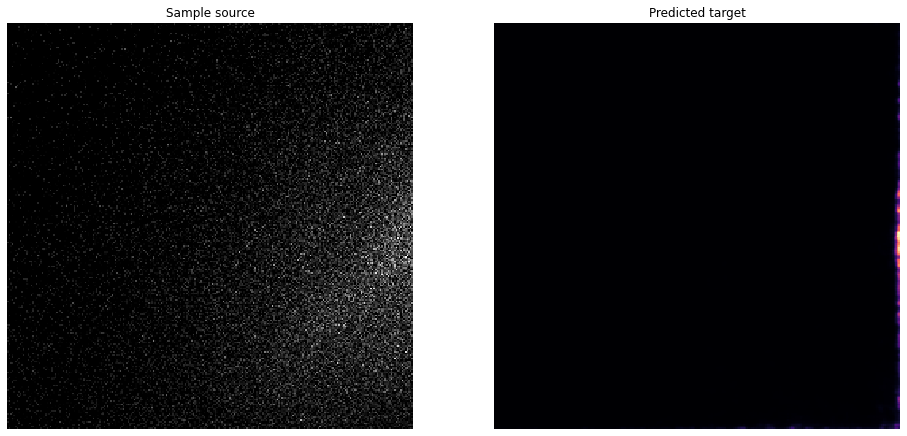

600/256 [======================================================================] - 565s 942ms/sample - loss: 0.0069 - dice_coefficient: 0.4588 - val_loss: 0.0073 - val_dice_coefficient: 0.3852
Epoch 2/3
255/256 [============================>.] - ETA: 0s - loss: 0.0081 - dice_coefficient: 0.4487

In [ ]:
#@markdown ##Start training

#here we check that no model with the same name already exist, if so delete
if not resume_training and os.path.exists(full_model_path): 
    shutil.rmtree(full_model_path)
    print(bcolors.WARNING+'!! WARNING: Folder already exists and has been overwritten !!'+bcolors.NORMAL) 

if not os.path.exists(full_model_path):
    os.makedirs(full_model_path)

pdf_export(augmentation = apply_data_augmentation, pretrained_model = resume_training)

# Save file
params_df.to_csv(os.path.join(full_model_path, 'params.csv'))

start = time.time()
# Start Training
model.train(epochs=number_of_epochs,
            batch_size=batch_size,
            train_generator=train_generator,
            val_generator=val_generator,
            model_path=model_path,
            model_name=model_name,
            loss=loss_function,
            metrics=metrics,
            optimizer=optimizer,
            learning_rate=learning_rate,
            ckpt_period=checkpointing_period,
            save_best_ckpt_only=save_best_only,
            ckpt_path=last_ckpt_path)

print('Training successfully completed!')
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#Create a pdf document with training summary

pdf_export(trained = True, augmentation = apply_data_augmentation, pretrained_model = resume_training)

##**4.2. Download your model from Google Drive**

---
<font size = 4>Once training is complete, the trained model is automatically saved to your Google Drive, in the **`model_path`** folder that was specified in Section 3. Download the folder to avoid any unwanted surprises, since the data can be erased if you train another model using the same `model_path`.

In [ ]:
#@markdown ##Download model directory
#@markdown 1.  <font size = 4>Specify the model_path in `model_path_download` otherwise the model sepcified in Section 3.1 will be downloaded
#@markdown 2.  <font size = 4>Run this cell to zip the model directory
#@markdown 3.  <font size = 4>Download the zipped file from the *Files* tab on the left

from google.colab import files

model_path_download = "" #@param {type:"string"}

if len(model_path_download) == 0:
    model_path_download = full_model_path

model_name_download = os.path.basename(model_path_download)

print('Zipping', model_name_download)

zip_model_path = model_name_download + '.zip'

!zip -r "$zip_model_path" "$model_path_download"

print('Successfully saved zipped model directory as', zip_model_path)

# **5. Evaluate your model**
---

<font size = 4>In this section the newly trained model can be assessed for performance. This involves inspecting the loss function in Section 5.1. and employing more advanced metrics in Section 5.2.

<font size = 4>**We highly recommend performing quality control on all newly trained models.**



In [4]:
#@markdown ###Model to be evaluated:
#@markdown <font size = 3>If left blank, the latest model defined in Section 3 will be evaluated:

qc_model_name = "arabidopsis-24012022" #@param {type:"string"}
qc_model_path = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ" #@param {type:"string"}

if len(qc_model_path) == 0 and len(qc_model_name) == 0:
    qc_model_name = model_name
    qc_model_path = model_path

full_qc_model_path = os.path.join(qc_model_path, qc_model_name)

if os.path.exists(full_qc_model_path):
    print(qc_model_name + ' will be evaluated')
else:
    W  = '\033[0m'  # white (normal)
    R  = '\033[31m' # red
    print(R+'!! WARNING: The chosen model does not exist !!'+W)
    print('Please make sure you provide a valid model path and model name before proceeding further.')


arabidopsis-24012022 will be evaluated


## **5.1. Inspecting loss function**
---

<font size = 4>**The training loss** is the error between prediction and target after each epoch calculated across the training data while the **validation loss** calculates the error on the (unseen) validation data. During training these values should decrease until converging at which point the model has been sufficiently trained. If the validation loss starts increasing while the training loss has plateaued, the model has overfit on the training data which reduces its ability to generalise. Aim to halt training before this point.

<font size = 4>**Note:** For a more in-depth explanation please refer to [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols et al.


<font size = 4>The accuracy is another performance metric that is calculated after each epoch. We use the [Sørensen–Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient) to score the prediction accuracy. 



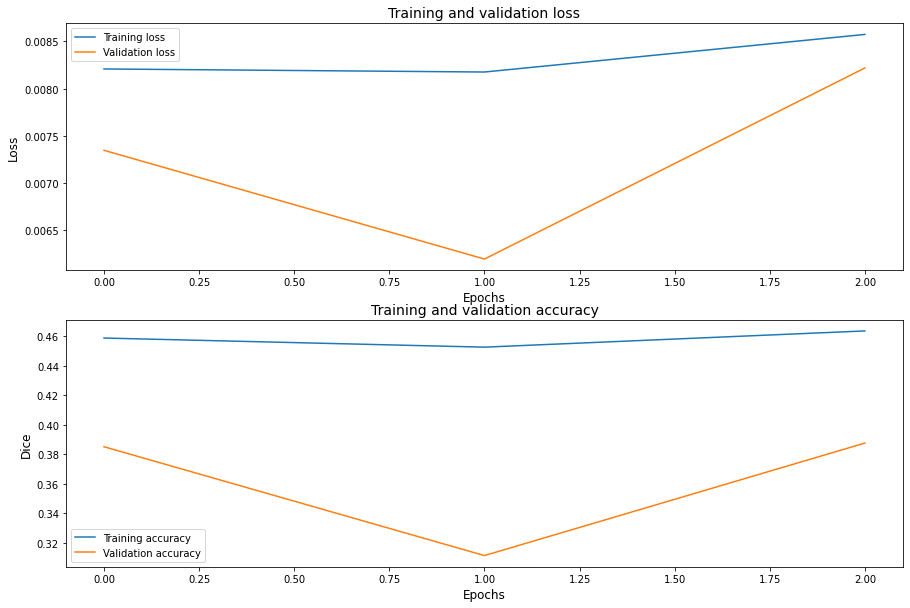

In [5]:
#@markdown ##Visualise loss and accuracy
lossDataFromCSV = []
vallossDataFromCSV = []
accuracyDataFromCSV = []
valaccuracyDataFromCSV = []

with open(full_qc_model_path + '/Quality Control/training_evaluation.csv', 'r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[2]))
        vallossDataFromCSV.append(float(row[4]))
        accuracyDataFromCSV.append(float(row[1]))
        valaccuracyDataFromCSV.append(float(row[3]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training and validation loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochNumber,accuracyDataFromCSV, label='Training accuracy')
plt.plot(epochNumber,valaccuracyDataFromCSV, label='Validation accuracy')
plt.title('Training and validation accuracy', fontsize=14)
plt.ylabel('Dice', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend()
plt.savefig(full_qc_model_path + '/Quality Control/lossCurvePlots.png', bbox_inches='tight', pad_inches=0)
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will provide both a visual indication of the model performance by comparing the overlay of the predicted and source volume.

In [6]:
#@markdown ##Compare prediction and ground-truth on testing data

#@markdown <font size = 4>Provide an unseen annotated dataset to determine the performance of the model:

testing_source = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/arabidopsis/validation/inputs/N_464_ds2x.tif" #@param{type:"string"}
testing_target = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/arabidopsis/validation/boundaries/N_464_ds2x.tif" #@param{type:"string"}

qc_dir = full_qc_model_path + '/Quality Control'
predict_dir = qc_dir + '/Prediction'
if os.path.exists(predict_dir):
    shutil.rmtree(predict_dir)

os.makedirs(predict_dir)

# predict_dir + '/' + 
predict_path = os.path.splitext(os.path.basename(testing_source))[0] + '_prediction.tif'

def last_chars(x):
    return(x[-11:])

try:
    ckpt_dir_list = glob(full_qc_model_path + '/ckpt/*')
    ckpt_dir_list.sort(key=last_chars)
    last_ckpt_path = ckpt_dir_list[0]
    print('Predicting from checkpoint:', os.path.basename(last_ckpt_path))
except IndexError:
    raise CheckpointError('No previous checkpoints were found, please retrain model.')

# Load parameters
params = pd.read_csv(os.path.join(full_qc_model_path, 'params.csv'), names=['val'], header=0, index_col=0)   

model = Unet3D(shape=params.loc['training_shape', 'val'])

prediction = model.predict(testing_source, last_ckpt_path, downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])

tifffile.imwrite(predict_path, prediction.astype('float32'), imagej=True)

print('Predicted images!')

qc_metrics_path = full_qc_model_path + '/Quality Control/QC_metrics_' + qc_model_name + '.csv'

test_target = tifffile.imread(testing_target)
test_source = tifffile.imread(testing_source)
test_prediction = tifffile.imread(predict_path)

def scroll_in_z(z):

    plt.figure(figsize=(25,5))
    # Source
    plt.subplot(1,4,1)
    plt.axis('off')
    plt.imshow(test_source[z-1], cmap='gray')
    plt.title('Source (z = ' + str(z) + ')', fontsize=15)

    # Target (Ground-truth)
    plt.subplot(1,4,2)
    plt.axis('off')
    plt.imshow(test_target[z-1], cmap='magma')
    plt.title('Target (z = ' + str(z) + ')', fontsize=15)

    # Prediction
    plt.subplot(1,4,3)
    plt.axis('off')
    plt.imshow(test_prediction[z-1], cmap='magma')
    plt.title('Prediction (z = ' + str(z) + ')', fontsize=15)
    
    # Overlay
    plt.subplot(1,4,4)
    plt.axis('off')
    plt.imshow(test_target[z-1], cmap='Greens')
    plt.imshow(test_prediction[z-1], alpha=0.5, cmap='Purples')
    plt.title('Overlay (z = ' + str(z) + ')', fontsize=15)
    plt.savefig(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_example_data.png', bbox_inches='tight', pad_inches=0)
interact(scroll_in_z, z=widgets.IntSlider(min=1, max=test_source.shape[0], step=1, value=0));

Predicting from checkpoint: arabidopsis-24012022.hdf5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Predicted images!


interactive(children=(IntSlider(value=1, description='z', max=391, min=1), Output()), _dom_classes=('widget-in…

## **5.3. Determine best Intersection over Union and threshold**
---

<font size = 4>**Note:** This section is only relevant if the target image is a binary mask and `binary_target` is selected in Section 3!  

<font size = 4>This section will provide both a visual and a quantitative indication of the model performance by comparing the overlay of the predicted and source volume, as well as computing the highest [**Intersection over Union**](https://en.wikipedia.org/wiki/Jaccard_index) (IoU) score. The IoU is also known as the Jaccard Index.  

<font size = 4>The best threshold is calculated using the IoU. Each threshold value from 0 to 255 is tested and the threshold with the highest score is deemed the best. The IoU is calculated for the entire volume in 3D.

In [7]:

#@markdown ##Calculate Intersection over Union and best threshold 
prediction = tifffile.imread(predict_path)
prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))

target = tifffile.imread(testing_target).astype(np.bool)

def iou_vs_threshold(prediction, target):
    threshold_list = []
    IoU_scores_list = []

    for threshold in range(0,256): 
        mask = prediction > threshold

        intersection = np.logical_and(target, mask)
        union = np.logical_or(target, mask)
        iou_score = np.sum(intersection) / np.sum(union)

        threshold_list.append(threshold)
        IoU_scores_list.append(iou_score)

    return threshold_list, IoU_scores_list

threshold_list, IoU_scores_list = iou_vs_threshold(prediction, target)
thresh_arr = np.array(list(zip(threshold_list, IoU_scores_list)))
best_thresh = int(np.where(thresh_arr == np.max(thresh_arr[:,1]))[0])
best_iou = IoU_scores_list[best_thresh]

print('Highest IoU is {:.4f} with a threshold of {}'.format(best_iou, best_thresh))

def adjust_threshold(threshold, z):

    f=plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    plt.imshow((prediction[z-1] > threshold).astype('uint8'), cmap='magma')
    plt.title('Prediction (Threshold = ' + str(threshold) + ')', fontsize=15)
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(target[z-1], cmap='magma')
    plt.title('Target (z = ' + str(z) + ')', fontsize=15)
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.axis('off')
    plt.imshow(test_source[z-1], cmap='gray')
    plt.imshow((prediction[z-1] > threshold).astype('uint8'), alpha=0.4, cmap='Reds')
    plt.title('Overlay (z = ' + str(z) + ')', fontsize=15)

    plt.subplot(1,4,4)
    plt.title('Threshold vs. IoU', fontsize=15)
    plt.plot(threshold_list, IoU_scores_list)
    plt.plot(threshold, IoU_scores_list[threshold], 'ro')     
    plt.ylabel('IoU score')
    plt.xlabel('Threshold')
    plt.savefig(os.path.join(qc_model_path,qc_model_name,'Quality Control')+'/QC_IoU_analysis.png',bbox_inches=matplotlib.transforms.Bbox([[17.5,0],[23,5]]),pad_inches=0)
    plt.show()

interact(adjust_threshold, 
         threshold=widgets.IntSlider(min=0, max=255, step=1, value=best_thresh),
         z=widgets.IntSlider(min=1, max=prediction.shape[0], step=1, value=0));

#Make a pdf summary of the QC results

qc_pdf_export()


Highest IoU is 0.4242 with a threshold of 233


interactive(children=(IntSlider(value=233, description='threshold', max=255), IntSlider(value=1, description='…

------------------------------
QC PDF report exported in /content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/arabidopsis-24012022/Quality Control/


## **5.4. Export your model into the BioImage Model Zoo format**
---
<font size = 4>This section exports the model into the BioImage Model Zoo format so it can be used directly with DeepImageJ. The new files will be stored in the model folder specified at the beginning of Section 5. 

<font size = 4>Once the cell is executed, you will find a new zip file with the name specified in `trained_model_name.bioimage.io.model`.

<font size = 4>To use it with deepImageJ, download it and unzip it in the ImageJ/models/ or Fiji/models/ folder of your local machine. 

<font size = 4>In ImageJ, open the example image given within the downloaded zip file. Go to Plugins > DeepImageJ > DeepImageJ Run. Choose this model from the list and click OK.

<font size = 4>  More information at https://deepimagej.github.io/deepimagej/

In [14]:
# ------------- User input ------------
# information about the model
#@markdown ##Introduce the information to document your model:
Trained_model_name    = "Name of the model" #@param {type:"string"}
Trained_model_authors =  "[Author 1 name, Author 2 name]" #@param {type:"string"}
Trained_model_authors_affiliation =  "[Author affiliation, Author 2 affiliation]" #@param {type:"string"}
Trained_model_description = "Description of the model " #@param {type:"string"}
Trained_model_license = 'MIT'#@param {type:"string"}
Trained_model_references = ["Falk et al. Nature Methods 2019", "Ronneberger et al. arXiv in 2015", "Lucas von Chamier et al. biorXiv 2020"] 
Trained_model_DOI = ["https://doi.org/10.1038/s41592-018-0261-2","https://doi.org/10.1007/978-3-319-24574-4_28", "https://doi.org/10.1101/2020.03.20.000133"] 

#@markdown ##Choose if you want to threshold the network output


# Add example image information
# ---------------------------------------
#@markdown ##Choose a threshold for deepImageJ's postprocessing macro:
apply_threshold = True #@param {type: "boolean"}
Use_The_Best_Average_Threshold = True #@param {type:"boolean"}
#@markdown ###If not, please input:
threshold = 210 #@param {type:"number"}
if Use_The_Best_Average_Threshold:
    threshold = best_thresh

#@markdown ##Introduce the voxel size (pixel size for each Z-slice and the distance between Z-salices) (in microns) of the image provided as an example of the model processing:
# information about the example image
PixelSize = 1 #@param {type:"number"}
Zdistance = 1 #@param {type:"number"}
#@markdown ##Do you want to choose the exampleimage?
default_example_image = True #@param {type:"boolean"}
#@markdown ###If not, please input:
fileID    =  "" #@param {type:"string"}
if default_example_image:
    fileID = testing_source

# Load model parameters
# ---------------------------------------
def last_chars(x):
    return(x[-11:])
try:
    ckpt_dir_list = glob(full_qc_model_path + '/ckpt/*')
    ckpt_dir_list.sort(key=last_chars)
    last_ckpt_path = ckpt_dir_list[0]
    print('Predicting from checkpoint:', os.path.basename(last_ckpt_path))
except IndexError:
    raise CheckpointError('No previous checkpoints were found, please retrain model.')

params = pd.read_csv(os.path.join(full_qc_model_path, 'params.csv'), names=['val'], header=0, index_col=0)   
# Load the model and process the example image
# ---------------------------------------
model = Unet3D(shape=params.loc['training_shape', 'val'])
# ------------- Execute bioimage model zoo configuration ------------
# Create a model without compilation so it can be used in any other environment.
unet = model.model
input  = unet.input
single_output = unet.output
# remove the custom loss function from the model, so that it can be used outside of this notebook
unet = Model(input, single_output)
weight_path = os.path.join(full_qc_model_path, 'keras_weights.hdf5')
unet.save(weight_path)


from skimage import io
from shutil import rmtree
from bioimageio.core.build_spec import build_model, add_weights
from bioimageio.core.resource_tests import test_model
from bioimageio.core.weight_converter.keras import convert_weights_to_tensorflow_saved_model_bundle

# create the author spec input
auth_names = Trained_model_authors[1:-1].split(",")
auth_affs = Trained_model_authors_affiliation[1:-1].split(",")
assert len(auth_names) == len(auth_affs)
authors = [{"name": auth_name, "affiliation": auth_aff} for auth_name, auth_aff in zip(auth_names, auth_affs)]

# I would recommend using CCBY-4 as licencese
license = Trained_model_license

# where to save the model
output_root = os.path.join(full_qc_model_path, Trained_model_name + '.bioimage.io.model')
os.makedirs(output_root, exist_ok=True)
output_path = os.path.join(output_root, f"{Trained_model_name}.zip")

# create a markdown readme with information
readme_path = os.path.join(output_root, "README.md")
with open(readme_path, "w") as f:
  f.write("Visit https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

# create the citation input spec
assert len(Trained_model_DOI) == len(Trained_model_references)
citations = {text: doi for text, doi in zip(Trained_model_references, Trained_model_DOI)}

# create the input spec
min_percentile = 1
max_percentile = 100
shape = [sh.value for sh in unet.input.shape]
# batch should never be constrained
assert shape[0] is None
shape[0] = 1  # batch is set to 1 for bioimagei.io
assert all(sh is not None for sh in shape)  # make sure all other shapes are fixed
pixel_size = {"x": PixelSize, "y": PixelSize, 'z': Zdistance}
kwargs = dict(
  input_name=["input"],
  input_axes=["bxyzc"],
  pixel_sizes=[pixel_size],
  preprocessing=[{"scale_range": {"min_percentile": min_percentile, 
                                  "max_percentile": max_percentile, 
                                  "mode": "per_sample",
                                  "axes": "xyzc"}}]
)

shape = tuple(shape)

if apply_threshold:
  print("The model output is thresholded")
  postprocessing = [{"binarize": {"threshold": threshold}}]
else:
  print("The model output is not thresholded")
  postprocessing = None

output_spec = dict(
  output_name=["output"],
  output_axes=["bxyzc"],
  postprocessing=postprocessing
)
kwargs.update(output_spec)

# load the input image, crop it if necessary and save as numpy file
test_img = tifffile.imread(fileID)  
assert test_img.ndim == 3
test_img = test_img[:shape[1], :shape[2], :shape[3]]
assert test_img.shape == shape[1:4], f"{test_img.shape}, {shape}"
# Save the test image
test_in_path = os.path.join(output_root, "test_input.npy")
np.save(test_in_path, test_img[None, ..., None])  # add batch and channel axis
# Normalize the image before adding batch and channel dimensions

n = test_img - np.min(test_img)
d = np.max(test_img) - np.min(test_img) 
test_img = n/d
test_img = test_img[None, ..., None] 
test_prediction = unet.predict(test_img)

# run prediction on the input image and save the result as expected output
if apply_threshold:
  test_prediction = np.squeeze(test_prediction) > threshold
else:
  test_prediction = np.squeeze(test_prediction)
assert test_prediction.ndim == 3
test_prediction = test_prediction[None, ..., None]  # add batch and channel axis
test_out_path = os.path.join(output_root, "test_output.npy")
np.save(test_out_path, test_prediction)

# attach the QC report to the model (if it exists)
qc_path = os.path.join(full_qc_model_path, 'Quality Control', 'training_evaluation.csv')
if os.path.exists(qc_path):
  attachments = {"files": [qc_path]}
else:
  attachments = None

# export the model with keras weihgts
build_model(
    weight_uri=weight_path,
    test_inputs=[test_in_path],
    test_outputs=[test_out_path],
    name=Trained_model_name,
    description=Trained_model_description,
    authors=authors,
    tags=['zerocostdl4mic', 'deepimagej', 'segmentation', 'tem', 'unet'],
    license=license,
    documentation=readme_path,
    cite=citations,
    output_path=output_path,
    add_deepimagej_config=True,
    tensorflow_version=tf.__version__,
    attachments=attachments,
    **kwargs
)

# convert the keras weights to tensorflow and add them to the model
tf_weight_path = os.path.join(full_qc_model_path, "tf_weights")
# we need to make sure that the tf weight folder does not exist
if os.path.exists(tf_weight_path):
  rmtree(tf_weight_path)
convert_weights_to_tensorflow_saved_model_bundle(output_path, tf_weight_path + ".zip")
add_weights(output_path, tf_weight_path + ".zip", output_path, tensorflow_version=tf.__version__)

# check that the model works for keras and tensorflow 
res = test_model(output_path, weight_format="keras_hdf5")
success = True
if res["error"] is not None:
  success = False
  print("test-model failed for keras weights:", res["error"])
  
res = test_model(output_path, weight_format="tensorflow_saved_model_bundle")
if res["error"] is not None:
  success = False
  print("test-model failed for tensorflow weights:", res["error"])

if success:
  print("The bioimage.io model was successfully exported to", output_path)
else:
  print("The bioimage.io model was exported to", output_path)
  print("Some tests of the model did not work! You can still download and test the model.")
  print("You can still download and test the model, but it may not work as expected.")

Predicting from checkpoint: arabidopsis-24012022.hdf5
The model output is thresholded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in true_divide


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.



INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/arabidopsis-24012022/tf_weights/saved_model.pb
TensorFlow model exported to /content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/arabidopsis-24012022/tf_weights.zip


/usr/local/lib/python3.7/dist-packages/bioimageio/core/prediction_pipeline/_model_adapters/_keras_model_adapter.py:27: UserWarning: Could not check tensorflow versions. The prediction results may be wrong.
  warnings.warn("Could not check tensorflow versions. The prediction results may be wrong.")


/usr/local/lib/python3.7/dist-packages/bioimageio/core/prediction_pipeline/_model_adapters/_keras_model_adapter.py:43: UserWarning: Device management is not implemented for keras yet, cannot unload model
  warnings.warn("Device management is not implemented for keras yet, cannot unload model")



Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from /tmp/bioimageio_cache/extracted_packages/b62488527074ea236ba229ef71c0b9ac76f43c9bb68b3f4df4ea990038e312c3/tf_weights/variables/variables
The bioimage.io model was successfully exported to /content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/arabidopsis-24012022/Name of the model.bioimage.io.model/Name of the model.zip


/usr/local/lib/python3.7/dist-packages/bioimageio/core/prediction_pipeline/_model_adapters/_tensorflow_model_adapter.py:117: UserWarning: Device management is not implemented for keras yet, cannot unload model
  warnings.warn("Device management is not implemented for keras yet, cannot unload model")


# **6. Using the trained model**

---

<font size = 4>Once sufficient performance of the trained model has been established using Section 5, the network can be used to segment unseen volumetric data.

## **6.1. Generate predictions from unseen dataset**
---

<font size = 4>The most recently trained model can now be used to predict segmentation masks on unseen images. If you want to use an older model, leave `model_path`  blank. Predicted output images are saved in `output_path` as Image-J compatible TIFF files.

## **Prediction parameters**

* <font size = 4>**`source_path`** specifies the location of the source 
image volume.

* <font size = 4>**`output_directory`** specified the directory where the output predictions are stored.

* <font size = 4>**`binary_target`** should be chosen if the network is trained to predict binary segmentation masks.

* <font size = 4>**`threshold`** can be calculated in Section 5 and is used to generate binary masks from the predictions.

* <font size = 4>**`big_tiff`** should be chosen if the expected prediction exceeds 4GB. The predictions will be saved using the BigTIFF format. Beware that this might substantially reduce the prediction speed. *Default: False* 

* <font size = 4>**`prediction_depth`** is only relevant if the prediction is saved as a BigTIFF. The prediction will not be performed in one go to not deplete the memory resources. Instead, the prediction is iteratively performed on a subset of the entire volume  with shape `(source.shape[0], source.shape[1], prediction_depth)`. *Default: 32*

* <font size = 4>**`model_path`** specifies the path to a model other than the most  recently trained.

In [ ]:
#@markdown ## Download example volume

#@markdown <font size = 4> This can take up to an hour

import requests  
import os
from tqdm.notebook import tqdm 


def download_from_url(url, save_as):
    file_url = url
    r = requests.get(file_url, stream=True)  
  
    with open(save_as, 'wb') as file:  
        for block in tqdm(r.iter_content(chunk_size = 1024), desc = 'Downloading ' + os.path.basename(save_as), total=3275073, ncols=1000):
            if block:
                file.write(block)  

download_from_url('https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/volumedata.tif', 'example_dataset/volumedata.tif')

In [ ]:
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then run the cell to predict outputs from your unseen images.

source_path = "" #@param {type:"string"}
output_directory = "" #@param {type:"string"}

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

output_path = os.path.join(output_directory, os.path.splitext(os.path.basename(source_path))[0] + '_predicted.tif')
#@markdown ###Prediction parameters:

binary_target = True #@param {type:"boolean"}

save_probability_map = False #@param {type:"boolean"}

#@markdown <font size = 3>Determine best threshold in Section 5.2.

use_calculated_threshold = True #@param {type:"boolean"}
threshold =  200#@param {type:"number"}

# Tifffile library issues means that images cannot be appended to 
#@markdown <font size = 3>Choose if prediction file exceeds 4GB or if input file is very large (above 2GB). Image volume saved as BigTIFF.
big_tiff = False #@param {type:"boolean"}

#@markdown <font size = 3>Reduce `prediction_depth` if runtime runs out of memory during prediction. Only relevant if prediction saved as BigTIFF

prediction_depth =  32#@param {type:"number"}

#@markdown ###Model to be evaluated
#@markdown <font size = 3>If left blank, the latest model defined in Section 5 will be evaluated

full_model_path_ = "" #@param {type:"string"}

if len(full_model_path_) == 0:
    full_model_path_ = os.path.join(qc_model_path, qc_model_name) 



# Load parameters
params = pd.read_csv(os.path.join(full_model_path_, 'params.csv'), names=['val'], header=0, index_col=0)   
model = Unet3D(shape=params.loc['training_shape', 'val'])

if use_calculated_threshold:
    threshold = best_thresh

def last_chars(x):
    return(x[-11:])

try:
    ckpt_dir_list = glob(full_model_path_ + '/ckpt/*')
    ckpt_dir_list.sort(key=last_chars)
    last_ckpt_path = ckpt_dir_list[0]
    print('Predicting from checkpoint:', os.path.basename(last_ckpt_path))
except IndexError:
    raise CheckpointError('No previous checkpoints were found, please retrain model.')

src = tifffile.imread(source_path)

if src.nbytes >= 4e9:
    big_tiff = True
    print('The source file exceeds 4GB in memory, prediction will be saved as BigTIFF!')

if binary_target:
    if not big_tiff:
        prediction = model.predict(src, last_ckpt_path, downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
        prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
        prediction = (prediction > threshold).astype('float32')

        tifffile.imwrite(output_path, prediction, imagej=True)

    else:
        with tifffile.TiffWriter(output_path, bigtiff=True) as tif:
            for i in tqdm(range(0, src.shape[0], prediction_depth)):
                prediction = model.predict(src, last_ckpt_path, z_range=(i,i+prediction_depth), downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
                prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
                prediction = (prediction > threshold).astype('float32')
                
                for j in range(prediction.shape[0]):
                    tif.save(prediction[j])

if not binary_target or save_probability_map:
    if not binary_target:
        prob_map_path = output_path
    else:
        prob_map_path = os.path.splitext(output_path)[0] + '_prob_map.tif'
    
    if not big_tiff:
        prediction = model.predict(src, last_ckpt_path, downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
        prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
        tifffile.imwrite(prob_map_path, prediction.astype('float32'), imagej=True)

    else:
        with tifffile.TiffWriter(prob_map_path, bigtiff=True) as tif:
            for i in tqdm(range(0, src.shape[0], prediction_depth)):
                prediction = model.predict(src, last_ckpt_path, z_range=(i,i+prediction_depth), downscaling=params.loc['downscaling', 'val'], true_patch_size=params.loc['true_patch_size', 'val'])
                prediction = np.interp(prediction, (prediction.min(), prediction.max()), (0, 255))
                
                for j in range(prediction.shape[0]):
                    tif.save(prediction[j])

print('Predictions saved as', output_path)

src_volume = tifffile.imread(source_path)
pred_volume = tifffile.imread(output_path)

def scroll_in_z(z):
  
    f=plt.figure(figsize=(25,5))
    plt.subplot(1,2,1)
    plt.imshow(src_volume[z-1], cmap='gray')
    plt.title('Source (z = ' + str(z) + ')', fontsize=15)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_volume[z-1], cmap='magma')
    plt.title('Prediction (z = ' + str(z) + ')', fontsize=15)
    plt.axis('off')

interact(scroll_in_z, z=widgets.IntSlider(min=1, max=src_volume.shape[0], step=1, value=0));


## **6.2. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**

---
<font size = 4>**v1.13**: 
* The section 1 and 2 are now swapped for better export of *requirements.txt*. 
* This version also now includes built-in version check and the version log that you're reading now.
* Keras libraries are now imported via TensorFlow.
* The learning rate can be changed in section 3.1.

---


#**Thank you for using 3D U-Net!**